In [187]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import os
from matplotlib.ticker import ScalarFormatter

In [74]:
folder_path = './df'
file_list = os.listdir(folder_path)

df = pd.DataFrame()

for file_name in file_list:
    file_path = folder_path + '/' + file_name
    print(file_name)
    
    df2 = pd.read_excel(file_path, skiprows=4)  
    df = pd.concat([df, df2], ignore_index=True, axis=0)


rollingsales_bronx.xlsx
rollingsales_brooklyn.xlsx
rollingsales_manhattan.xlsx
rollingsales_queens.xlsx
rollingsales_statenisland.xlsx


In [120]:
df.fillna(-999, inplace=True)
df.drop(['EASEMENT'], axis=1, inplace=True)

In [121]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,A1,410 EAST 179TH STREET,-999,10457,1,0,1,1842,2048,1901,1,A1,655000,2022-11-01
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,-999,10457,1,0,1,1646,1497,1899,1,A1,215000,2023-04-18
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,-999,10457,1,0,1,1646,1497,1899,1,A1,570000,2023-08-23
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,A1,461 EAST 178 STREET,-999,10457,1,0,1,1782,1548,1899,1,A1,0,2023-04-14
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,B9,454 EAST 172 STREET,-999,10457,2,0,2,1658,1428,1901,1,B9,350000,2023-06-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,A1,N/A LENEVAR AVENUE,-999,10309,1,0,1,2603,0,2022,1,V0,1116638,2022-12-19
73301,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,A1,N/A LENEVAR AVENUE,-999,10309,1,0,1,2551,0,-999,1,V0,1116638,2022-12-19
73302,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,V0,N/A LENEVAR AVENUE,-999,10309,0,0,0,2597,0,2023,1,V0,1116638,2022-12-19
73303,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,V0,96 LENEVAR AVENUE,-999,10309,0,0,0,2644,0,2023,1,V0,1116638,2022-12-19


In [174]:
df['BOROUGH']= pd.to_numeric(df['BOROUGH']).astype(int)
df['BLOCK']= pd.to_numeric(df['BLOCK']).astype(int)
df['LOT']= pd.to_numeric(df['LOT']).astype(int)
# df['EASEMENT']= pd.to_numeric(df['EASEMENT']).astype(int)
df['ZIP CODE']= pd.to_numeric(df['ZIP CODE']).astype(int)
df['RESIDENTIAL UNITS']= pd.to_numeric(df['RESIDENTIAL UNITS']).astype(int)
df['COMMERCIAL UNITS']= pd.to_numeric(df['COMMERCIAL UNITS']).astype(int)
df['TOTAL UNITS']= pd.to_numeric(df['TOTAL UNITS']).astype(int)
df['LAND SQUARE FEET']= pd.to_numeric(df['LAND SQUARE FEET']).astype(int)
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET']).astype(int)
df['YEAR BUILT']= pd.to_numeric(df['YEAR BUILT']).astype(int)
df['TAX CLASS AT TIME OF SALE']= pd.to_numeric(df['TAX CLASS AT TIME OF SALE']).astype(int)
df['SALE PRICE']= pd.to_numeric(df['SALE PRICE']).astype(int)
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format='%Y-%m-%d', errors='coerce')

df.loc[df['BOROUGH'] == 1, 'BOROUGH_NAME'] = 'manhattan'
df.loc[df['BOROUGH'] == 2, 'BOROUGH_NAME'] = 'bronx'
df.loc[df['BOROUGH'] == 3, 'BOROUGH_NAME'] = 'brooklyn'
df.loc[df['BOROUGH'] == 4, 'BOROUGH_NAME'] = 'queens'
df.loc[df['BOROUGH'] == 5, 'BOROUGH_NAME'] = 'statenisland'

In [175]:
df.dtypes

BOROUGH                                    int32
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int32
LOT                                        int32
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int32
RESIDENTIAL UNITS                          int32
COMMERCIAL UNITS                           int32
TOTAL UNITS                                int32
LAND SQUARE FEET                           int32
GROSS SQUARE FEET                          int32
YEAR BUILT                                 int32
TAX CLASS AT TIME OF SALE                  int32
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int32
SALE DATE                         datetime64[ns]
BOROUGH_NAME        

In [176]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,A1,410 EAST 179TH STREET,-999,10457,...,0,1,1842,2048,1901,1,A1,655000,2022-11-01,bronx
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,-999,10457,...,0,1,1646,1497,1899,1,A1,215000,2023-04-18,bronx
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,-999,10457,...,0,1,1646,1497,1899,1,A1,570000,2023-08-23,bronx
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,A1,461 EAST 178 STREET,-999,10457,...,0,1,1782,1548,1899,1,A1,0,2023-04-14,bronx
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,B9,454 EAST 172 STREET,-999,10457,...,0,2,1658,1428,1901,1,B9,350000,2023-06-26,bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,A1,N/A LENEVAR AVENUE,-999,10309,...,0,1,2603,0,2022,1,V0,1116638,2022-12-19,statenisland
73301,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,A1,N/A LENEVAR AVENUE,-999,10309,...,0,1,2551,0,-999,1,V0,1116638,2022-12-19,statenisland
73302,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,V0,N/A LENEVAR AVENUE,-999,10309,...,0,0,2597,0,2023,1,V0,1116638,2022-12-19,statenisland
73303,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,V0,96 LENEVAR AVENUE,-999,10309,...,0,0,2644,0,2023,1,V0,1116638,2022-12-19,statenisland


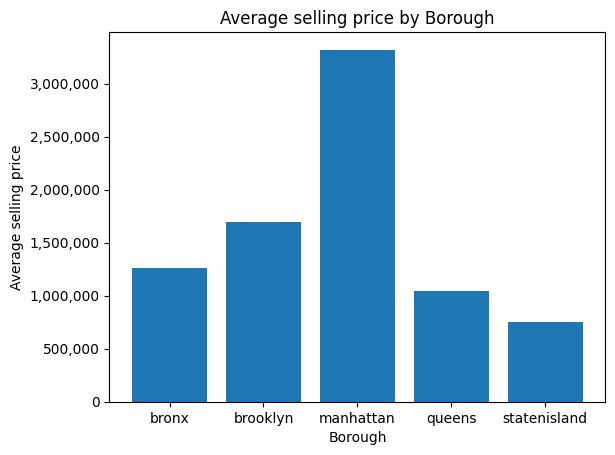

In [192]:
average_price_by_borough = df[df['SALE PRICE'] != 0].groupby('BOROUGH_NAME')['SALE PRICE'].mean().reset_index()

plt.bar(average_price_by_borough['BOROUGH_NAME'], average_price_by_borough['SALE PRICE'])
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Borough') 
plt.ylabel('Average selling price')
plt.title('Average selling price by Borough')
plt.show()

Text(0.5, 1.0, 'Neighborhood with the highest and lowest average price')

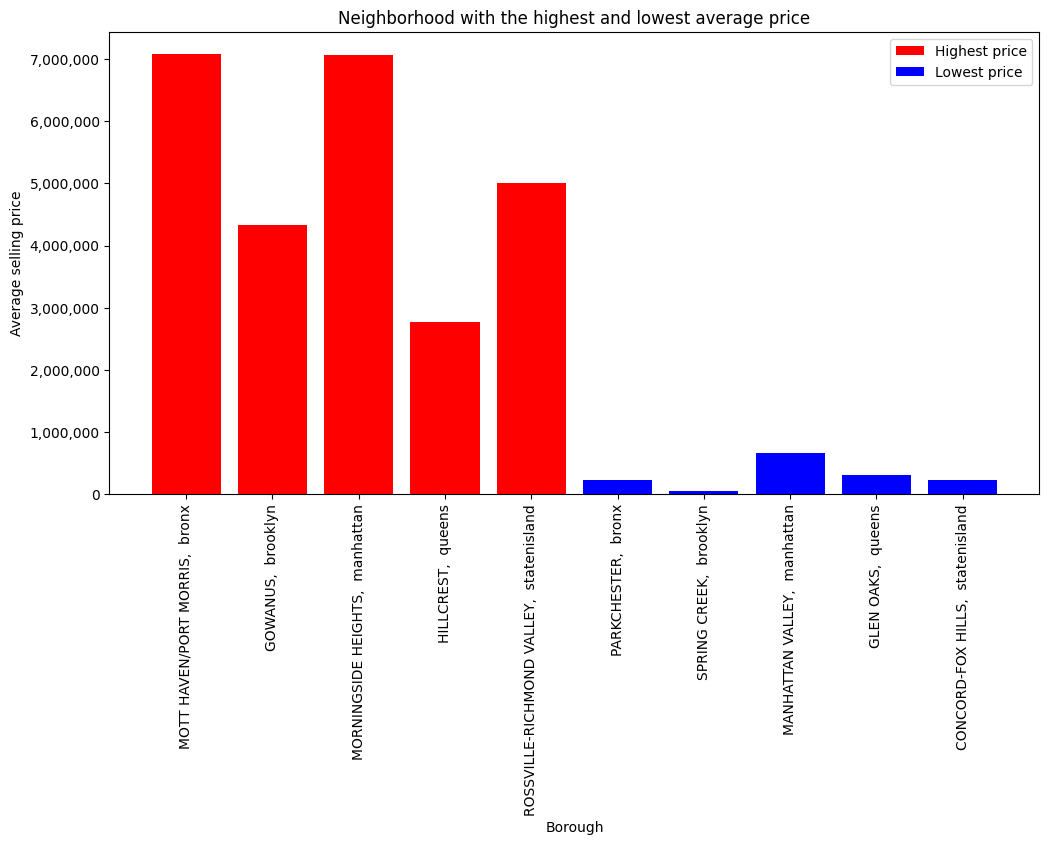

In [443]:
df_pzh = df.groupby(['BOROUGH_NAME', 'NEIGHBORHOOD'])['SALE PRICE'].mean().reset_index()

df_pzh2 = df_pzh.groupby('BOROUGH_NAME')['SALE PRICE'].idxmax()
df_pzh2
max_sales_df2 = df_pzh.loc[df_pzh2]

df_pzh3 = df_pzh[df_pzh['SALE PRICE'] != 0].groupby('BOROUGH_NAME')['SALE PRICE'].idxmin()
min_sales_df2 = df_pzh.loc[df_pzh3]

plt.figure(figsize=(12, 6))
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.bar(max_sales_df2['NEIGHBORHOOD'] + ',  ' + max_sales_df2['BOROUGH_NAME'], max_sales_df2['SALE PRICE'], color='red', label='Highest price')

plt.bar(min_sales_df2['NEIGHBORHOOD'] + ',  ' + min_sales_df2['BOROUGH_NAME'], min_sales_df2['SALE PRICE'], color='blue', label='Lowest price')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Borough')
plt.ylabel('Average selling price')
plt.title('Neighborhood with the highest and lowest average price')



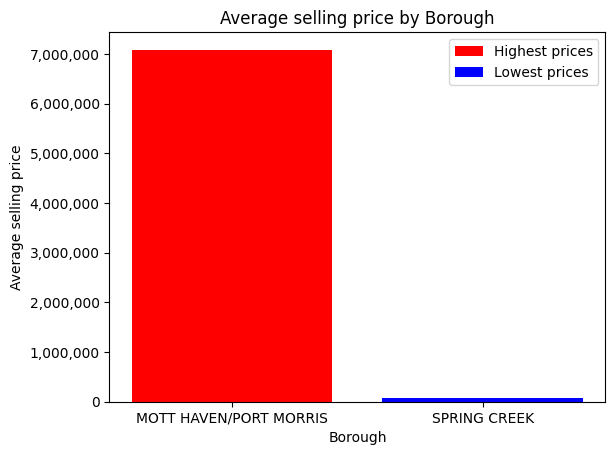

In [461]:
que = df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()
que2 = df[df['SALE PRICE'] != 0].groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()

max_index = que['SALE PRICE'].idxmax()
max_avg_sale = que.loc[max_index]

min_index = que2['SALE PRICE'].idxmin()
min_avg_sale = que2.loc[min_index]

plt.bar(max_avg_sale['NEIGHBORHOOD'], max_avg_sale['SALE PRICE'], color='red', label='Highest prices')
plt.bar(min_avg_sale['NEIGHBORHOOD'], min_avg_sale['SALE PRICE'], color='blue', label='Lowest prices')

plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.xlabel('Borough') 
plt.ylabel('Average selling price')
plt.title('Average selling price by Borough')
plt.show()

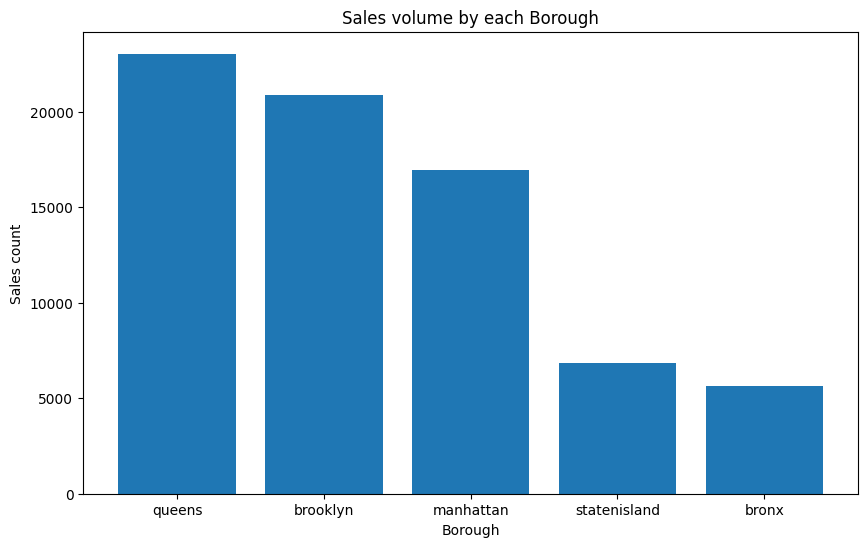

In [490]:
plt.figure(figsize=(10, 6))

res1 = df['BOROUGH_NAME'].value_counts().reset_index()

plt.bar(res1['BOROUGH_NAME'], res1['count'])
plt.xlabel('Borough')
plt.ylabel('Sales count')
plt.title('Sales volume by each Borough')
plt.show()


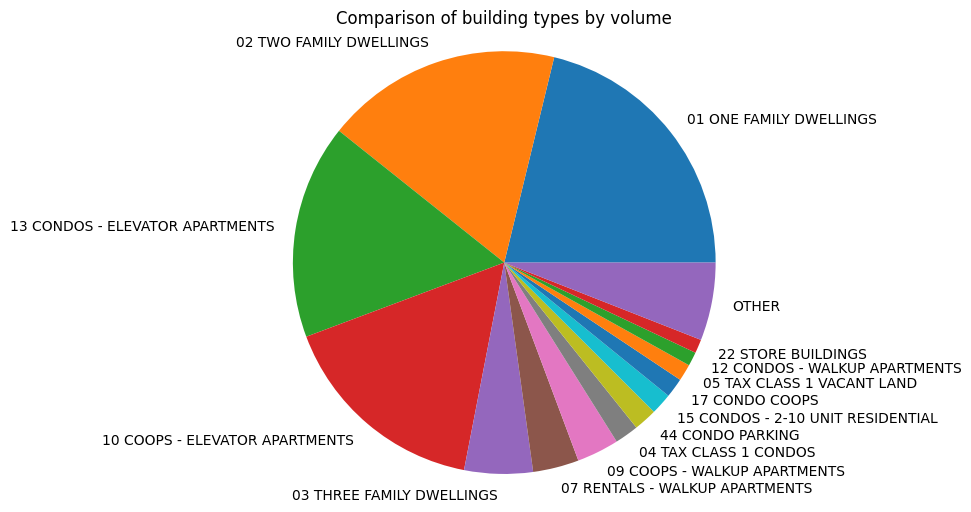

In [624]:
building_type_counts = df['BUILDING CLASS CATEGORY'].value_counts().reset_index()

building_type_counts2 = building_type_counts[building_type_counts['count'] > 500].copy()
que20 = pd.Series({'BUILDING CLASS CATEGORY': 'OTHER', 'count': building_type_counts3['count'].sum()})
building_type_counts2.loc[len(building_type_counts2)] = que20

plt.figure(figsize=(6, 6))
plt.pie(building_type_counts2['count'], labels=building_type_counts2['BUILDING CLASS CATEGORY'])
plt.axis('equal')
plt.title('Comparison of building types by volume')
plt.show()

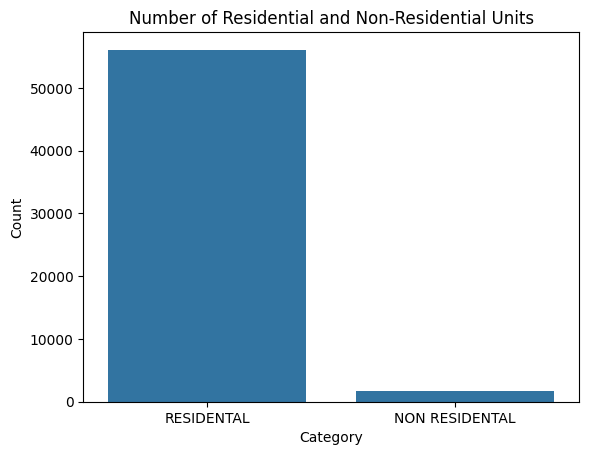

In [689]:
resid = pd.DataFrame()
resid = df[(df['TOTAL UNITS'] != -999) & (df['TOTAL UNITS'] >= 1)]

non_resid = pd.DataFrame()
non_resid = df[(df['TOTAL UNITS'] != -999) & (df['TOTAL UNITS'] == 0)]
non_resid.shape[0]

res21 = pd.DataFrame({'RESIDENTAL': [resid.shape[0]], 'NON RESIDENTAL': [non_resid.shape[0]]})
res21_long = res21.melt(var_name='Category', value_name='Count')

sns.barplot(x='Category', y='Count', data=res21_long)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Residential and Non-Residential Units')
plt.show()

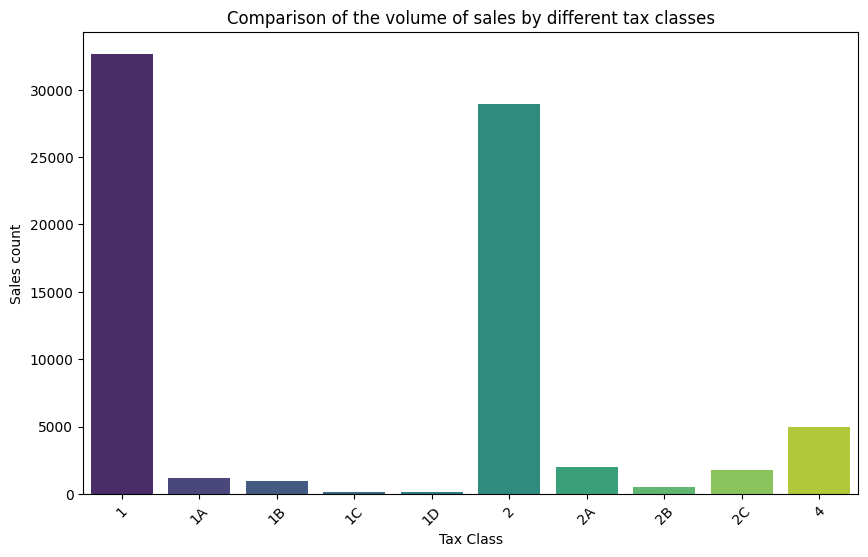

In [690]:
# Порівняння обсягу продажів за різними податковими класами
sales_by_tax_class = df[df['TAX CLASS AT PRESENT'] != -999].groupby('TAX CLASS AT PRESENT')['SALE PRICE'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=sales_by_tax_class,hue ='TAX CLASS AT PRESENT',palette='viridis')
plt.xlabel('Tax Class')
plt.ylabel('Sales count')
plt.title('Comparison of the volume of sales by different tax classes')
plt.xticks(rotation=45)
plt.show()

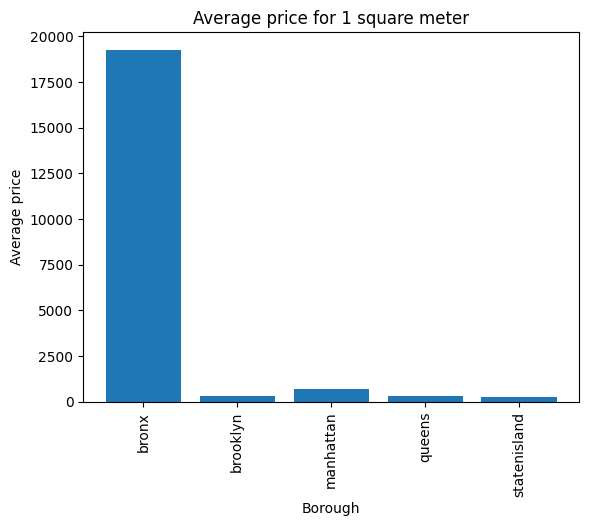

In [705]:
filtered_data = df[(df['GROSS SQUARE FEET'] > 0) & (df['GROSS SQUARE FEET'] != -999)]
filtered_data2 = filtered_data.copy()
filtered_data2['PRICE PER SQFT'] = filtered_data['SALE PRICE'] / filtered_data['GROSS SQUARE FEET']
filtered_data3 = filtered_data2.groupby('BOROUGH_NAME')['PRICE PER SQFT'].mean().reset_index()

plt.bar(filtered_data3['BOROUGH_NAME'], filtered_data3['PRICE PER SQFT'])
plt.xlabel('Borough')
plt.ylabel('Average price')
plt.title('Average price for 1 square meter')
plt.xticks(rotation=90)
plt.show()

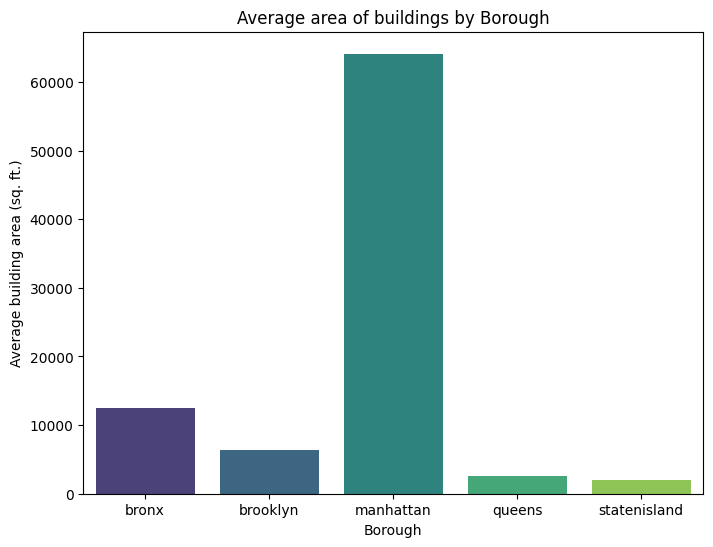

In [724]:
filtered_data = df[df['GROSS SQUARE FEET'] > 0]

average_sqft_by_borough = filtered_data.groupby('BOROUGH_NAME')['GROSS SQUARE FEET'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_sqft_by_borough, x='BOROUGH_NAME', y='GROSS SQUARE FEET', hue='BOROUGH_NAME', palette='viridis')
plt.xlabel('Borough')
plt.ylabel('Average building area (sq. ft.)')
plt.title('Average area of buildings by Borough')
plt.show()

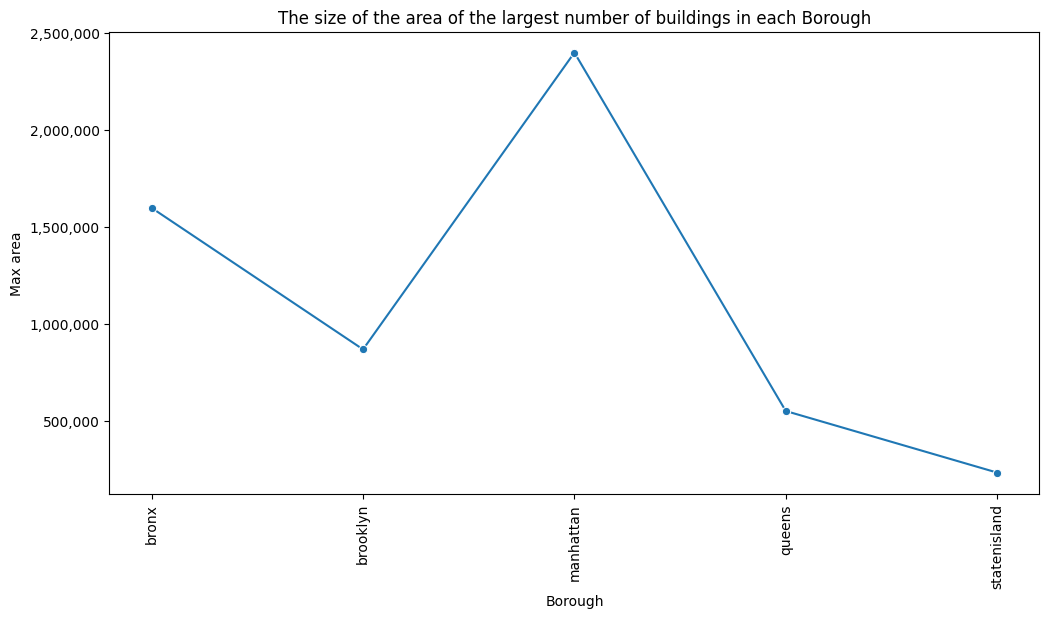

In [760]:
max_sqft_by_neighborhood = df.groupby('BOROUGH_NAME')['GROSS SQUARE FEET'].idxmax()
max_sqft_by_neighborhood_df2 = df.loc[max_sqft_by_neighborhood]
max_sqft_by_neighborhood_df2

plt.figure(figsize=(12, 6))
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(data=max_sqft_by_neighborhood_df2, x='BOROUGH_NAME', y='GROSS SQUARE FEET', marker='o')
plt.xlabel('Borough')
plt.ylabel('Max area')
plt.title('The size of the area of the largest number of buildings in each Borough')
plt.xticks(rotation=90)
plt.show()

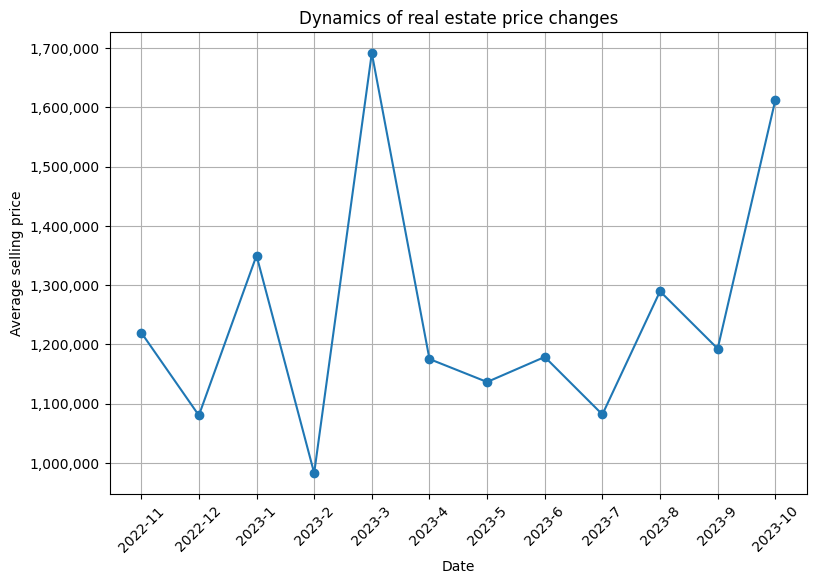

In [810]:
df_with_ext_date = df
df_with_ext_date['Year'] = pd.to_numeric(df_with_ext_date['SALE DATE'].dt.year).astype(int)
df_with_ext_date['Month'] = pd.to_numeric(df_with_ext_date['SALE DATE'].dt.month)
df_with_ext_date['Day'] = pd.to_numeric(df_with_ext_date['SALE DATE'].dt.day)

average_price_by_month = df_with_ext_date.groupby(['Year', 'Month'])['SALE PRICE'].mean().reset_index()
average_price_by_month2 = average_price_by_month.copy()
average_price_by_month2['Date'] = average_price_by_month['Year'].astype('str') + '-' + average_price_by_month['Month'].astype('str')

plt.figure(figsize=(9, 6))
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(average_price_by_month2['Date'], average_price_by_month2['SALE PRICE'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average selling price')
plt.title('Dynamics of real estate price changes')
plt.xticks(rotation=45)
plt.grid()
plt.show()

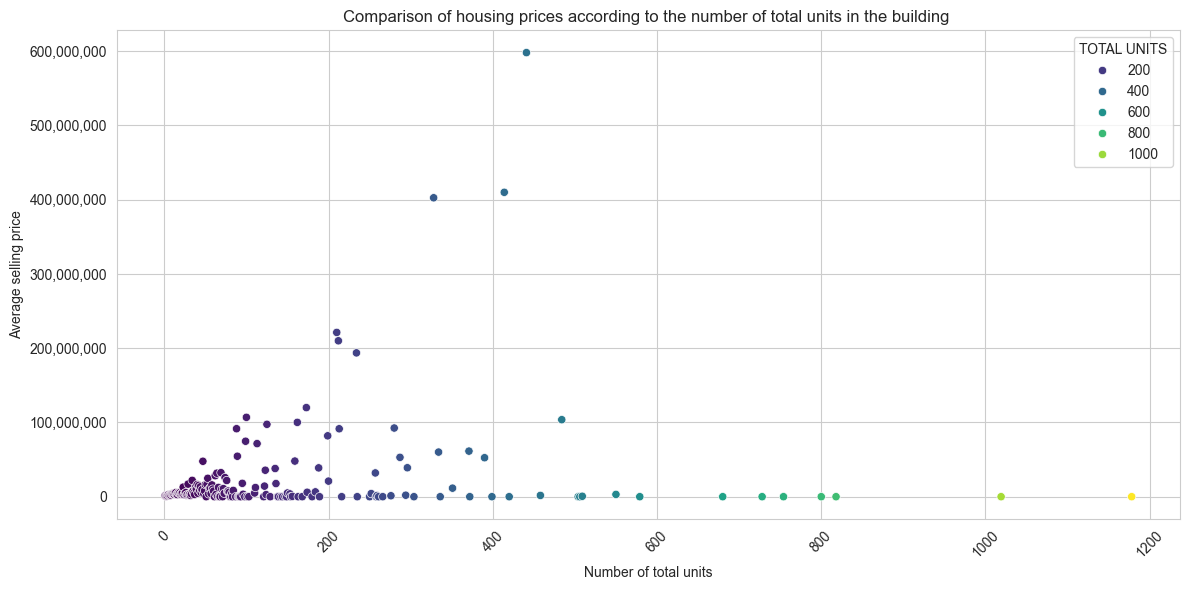

In [827]:
grouped_data = df[(df['TOTAL UNITS'] > 0) & (df['SALE PRICE'] >= 0)].groupby('TOTAL UNITS')['SALE PRICE'].mean().reset_index()
grouped_data

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.scatterplot(data=grouped_data, x='TOTAL UNITS', y='SALE PRICE', hue='TOTAL UNITS', palette='viridis')
plt.title('Comparison of housing prices according to the number of total units in the building ')
plt.xlabel('Number of total units')
plt.ylabel('Average selling price')
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()